In [196]:
import numpy as np
import math
import os
from sklearn.svm import SVC
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# 决策边界函数
def plot_decision_boundary_svm(clf, X, y, target_names=None, feature_names=["x","y"], legend=True,
                               axis=[0,6,0,2], title="decision boundary", 
                               plot_training=True, plot_support_vector=True,
                               data_standardscaler=False, standardscaler_func=None):
    if data_standardscaler:
        assert standardscaler_func is not None
        X = standardscaler_func.transform(X)
        
    if plot_training:
        if target_names is None:
            target_names = list(set(y))
        for index,i in enumerate(list(set(y))):
            plt.scatter(X[:,0][y==i],X[:,1][y==i],label=target_names[index])
            
    # plot center decision boundary  --> x1*w1 + x2*w2 + b = 0
    W = clf.coef_[0]
    b = clf.intercept_
    w1,w2 = W
    
    x1 = np.linspace(axis[0], axis[1], 200)
    x2 = -(x1*w1)/w2 - b/w2
    plt.plot(x1, x2, 'k-')
    
    # plot linear of support vectors
    #margin = 1/math.sqrt(w1**2 + w2**2)
    margin = 1/w2
    x_vector_upper = x2 + margin
    x_vector_down = x2 - margin
    plt.plot(x1, x_vector_upper, 'k--')
    plt.plot(x1, x_vector_down, 'k--')
    
    # plot support vectors
    if plot_support_vector:
        support_vectors = clf.support_vectors_
        plt.scatter(support_vectors[:,0], support_vectors[:,1], s=200, c="#FFAAAA", alpha=0.5)
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.axis(axis)
    plt.grid(True)
    if legend:
        plt.legend()
    plt.title(title)

from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, feature_names=["x","y"], target_names=[0,1],
                           axis=[-2, 4, -2, 3],legend=True, alpha=0.5,
                           plot_training=True, title='Decision boundary'):
    custom_cmap = ListedColormap(['y','#9898ff','#a0faa0'])
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#505d50'])
    
    x1s = np.linspace(axis[0],axis[1],100)
    x2s = np.linspace(axis[2],axis[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    #print(x1.shape)
    
    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1,x2,y_pred,cmap=custom_cmap,alpha=0.3)
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    
    if plot_training:
        for index,name in enumerate(target_names):
            plt.scatter(X[:,0][y==index], X[:,1][y==index],label=name, alpha=alpha)
    if legend:
        plt.legend()
            
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.grid(True)

## 导入数据

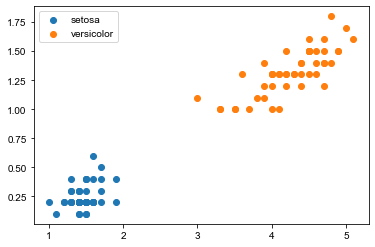

In [184]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,(2,3)]
y = iris.target

# 选择 两种类别即可
selected = (y==0) | (y==1)
X = X[selected]
y = y[selected]

target_names=iris.target_names[[0,1]]
feature_names=iris.feature_names[2:]

# plot
plt.scatter(X[:,0][y==0], X[:,1][y==0],label=iris.target_names[0])
plt.scatter(X[:,0][y==1], X[:,1][y==1],label=iris.target_names[1])
plt.legend()

## 训练

In [185]:
svm_clf = SVC(kernel='linear', C=float('inf')) # C为软间隔的正则化系数，越大则软间隔越小
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

In [186]:
svm_clf.coef_, svm_clf.intercept_, svm_clf.support_vectors_

(array([[1.29411744, 0.82352928]]),
 array([-3.78823471]),
 array([[1.9, 0.4],
        [3. , 1.1]]))

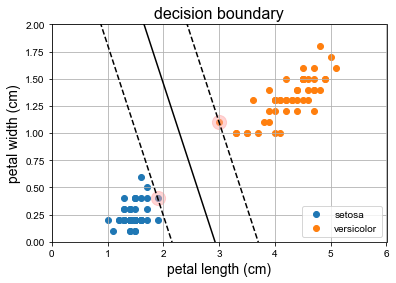

In [187]:
plot_decision_boundary_svm(svm_clf, X, y, target_names=target_names, 
                           feature_names=feature_names)

## 软间隔的作用
可以使用超参数C控制软间隔程度

In [188]:
# 导入数据 - 标准化，线性SVC训练
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = iris.data[:,(2,3)]
y = (iris.target == 2).astype(int)
target_names = ['Non-'+iris.target_names[2],iris.target_names[2]]
feature_names = iris.feature_names[2:]

In [189]:
# fit 
svc_clf0 = LinearSVC(C=float('inf'))  # non soft-margin
svc_clf1 = LinearSVC(C=0.1)  # big soft-margin
svc_clf2 = LinearSVC(C=10)  # small soft-margin

pip_clf0 = Pipeline((
    ('stdscr',StandardScaler()),
    ('svc',svc_clf0)
))

pip_clf1 = Pipeline((
    ('stdscr',StandardScaler()),
    ('svc',svc_clf1)
))

pip_clf2 = Pipeline((
    ('stdscr',StandardScaler()),
    ('svc',svc_clf2)
))

pip_clf1.fit(X,y)
pip_clf2.fit(X,y)
pip_clf0.fit(X,y)

Pipeline(steps=[('stdscr', StandardScaler()), ('svc', LinearSVC(C=inf))])

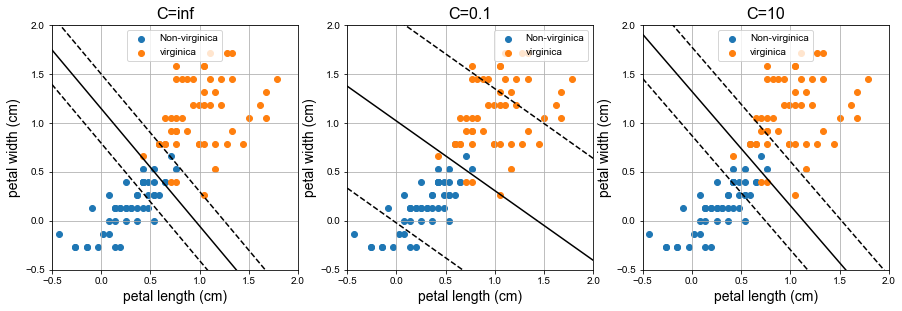

In [190]:
# plot
plt.figure(figsize=(15,4.5))
plt.subplot(1,3,1)
plot_decision_boundary_svm(pip_clf0[1], X, y, target_names=target_names, axis=[-0.5,2,-0.5,2],
                           feature_names=feature_names, plot_support_vector=False,
                           data_standardscaler=True, standardscaler_func=pip_clf0[0],
                          title = f"C={pip_clf0[1].C}")
plt.subplot(1,3,2)
plot_decision_boundary_svm(pip_clf1[1], X, y, target_names=target_names, axis=[-0.5,2,-0.5,2],
                           feature_names=feature_names, plot_support_vector=False,
                           data_standardscaler=True, standardscaler_func=pip_clf1[0],
                          title = f"C={pip_clf1[1].C}")
plt.subplot(1,3,3)
plot_decision_boundary_svm(pip_clf2[1], X, y, target_names=target_names, axis=[-0.5,2,-0.5,2],
                           feature_names=feature_names, plot_support_vector=False,
                           data_standardscaler=True, standardscaler_func=pip_clf2[0],
                          title = f"C={pip_clf2[1].C}")

## 非线形SVM

### 通过增加维度创建非线性

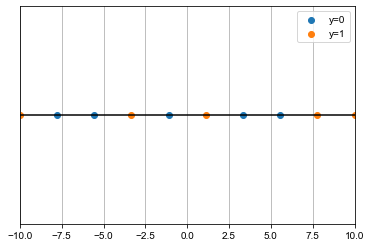

In [191]:
## 示例 - 1
X1D = np.linspace(-10,10,10).reshape(-1,1)
y = np.zeros_like(X1D).flatten()
classifer_mask = np.random.permutation(len(y))[:int(len(y)/2)]
y[classifer_mask] = 1

plt.grid(True, which="both")
plt.scatter(X1D[y==0], y[y==0], label="y=0")
plt.scatter(X1D[y==1], y[y==1]==0, label="y=1")
plt.axhline(y=0, color="k")
plt.axis([-10,10,-1,1])
plt.gca().get_yaxis().set_ticks([])  # 取消y轴
plt.legend()

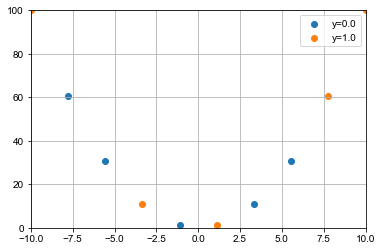

In [192]:
## 示例 - 2
X2D = np.c_[X1D, X1D**2]
def plot_data(X, y, axis=[-10,10,0,100], legend=True):
    plt.grid(True, which="both")
    for i in set(y):
        plt.scatter(X[:,0][y==i], X[:,1][y==i], label=f"y={i}")
    
    plt.axis(axis)
    if legend:
        plt.legend()
plot_data(X2D, y)

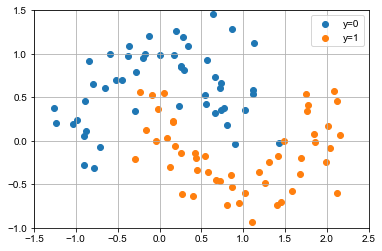

In [193]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.25, random_state=0)

plot_data(X, y, axis=[-1.5,2.5,-1,1.5])

In [211]:
# fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# C=0.1
    # degree = 2
poly_std_clf10 = Pipeline((('polynomial',PolynomialFeatures(degree=2)),
                         ('Standard',StandardScaler()),
                         ('linearsvm',LinearSVC(C=0.1))))
poly_std_clf10.fit(X,y)

    # degree = 5
poly_std_clf11 = Pipeline((('polynomial',PolynomialFeatures(degree=5)),
                         ('Standard',StandardScaler()),
                         ('linearsvm',LinearSVC(C=0.1))))
poly_std_clf11.fit(X,y)

# C=100
    #degree = 2
poly_std_clf20 = Pipeline((('polynomial',PolynomialFeatures(degree=2)),
                         ('Standard',StandardScaler()),
                         ('linearsvm',LinearSVC(C=100))))
poly_std_clf20.fit(X,y)

    #degree = 5
poly_std_clf21 = Pipeline((('polynomial',PolynomialFeatures(degree=5)),
                         ('Standard',StandardScaler()),
                         ('linearsvm',LinearSVC(C=100))))
poly_std_clf21.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                ('Standard', StandardScaler()),
                ('linearsvm', LinearSVC(C=100))])

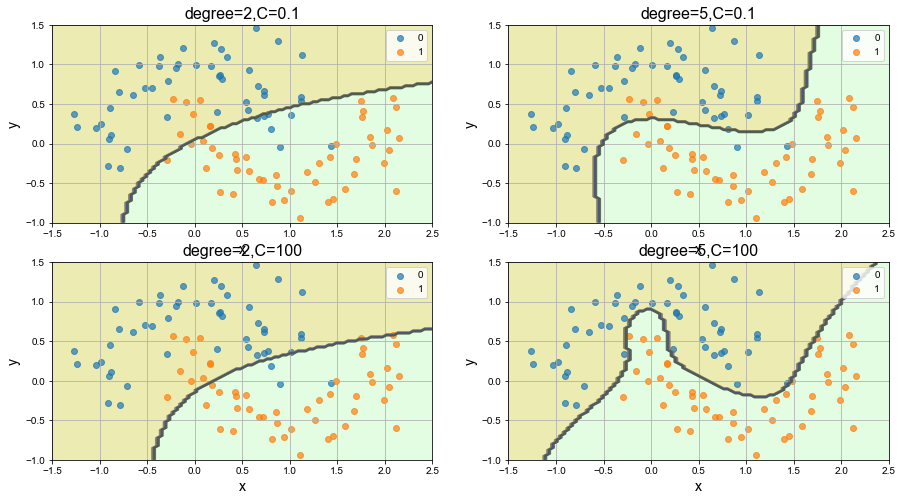

In [210]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plot_decision_boundary(poly_std_clf10,X,y,axis=[-1.5,2.5,-1,1.5],alpha=0.7, title="degree=2,C=0.1")
plt.subplot(222)
plot_decision_boundary(poly_std_clf11,X,y,axis=[-1.5,2.5,-1,1.5],alpha=0.7,title="degree=5,C=0.1")
plt.subplot(223)
plot_decision_boundary(poly_std_clf20,X,y,axis=[-1.5,2.5,-1,1.5],alpha=0.7,title="degree=2,C=100")
plt.subplot(224)
plot_decision_boundary(poly_std_clf21,X,y,axis=[-1.5,2.5,-1,1.5],alpha=0.7,title="degree=5,C=100")
plt.show()

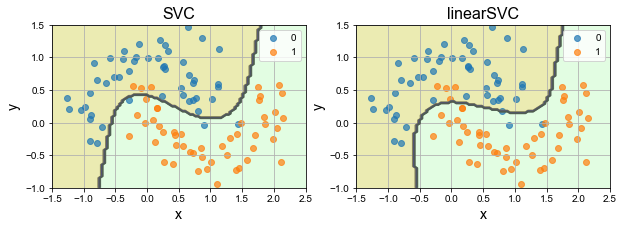

In [220]:
## PolynomialFeatures 和 LinearSVC 可以用 SVC(kernel="poly", degree=n ) 来实现?
from sklearn.svm import SVC
svc_clf = Pipeline((
    ('std',StandardScaler()),
    ('svc',SVC(kernel="poly", degree=5, coef0=1, C=0.1)),  # 偏置项 coef0 很重要，没有它就没有 y = wx+b 就没有b
                   ))
svc_clf.fit(X,y)

plt.figure(figsize=(10,3))
plt.subplot(121)
plot_decision_boundary(svc_clf,X,y,axis=[-1.5,2.5,-1,1.5],alpha=0.7,title="SVC")
plt.subplot(122)
plot_decision_boundary(poly_std_clf11,X,y,axis=[-1.5,2.5,-1,1.5],alpha=0.7,title="linearSVC")
plt.show()

## 高斯核函数 - rbf
假设 x 是一维特征， 通过 rbf 可以转换为 二维  
new_x[0] = exp(-gamma * ||x-landmark_0||^2)  
new_x[1] = exp(-gamma * ||x-landmark_1||^2)  

In [249]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp( -gamma * np.linalg.norm(x-landmark, axis=1)**2 )

gamma = 0.3
landmark = -2, 1
X = np.linspace(-4,4,9).reshape(-1,1)
y = np.array([0,0,1,1,1,1,1,0,0])
#gaussian_rbf(np.array([[-1]]), -2, gamma)

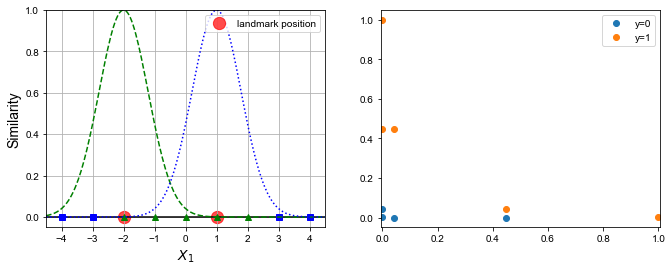

In [272]:
def plot_rbf(X,y,landmark,gamma,axis=[-4.5,4.5,0,1],legend=True):
    x1s = np.linspace(axis[0], axis[1], 200).reshape(-1,1)

    x2s = gaussian_rbf(x1s, landmark[0], gamma)
    x3s = gaussian_rbf(x1s, landmark[1], gamma)

    XK = np.c_[gaussian_rbf(X, landmark[0], gamma), gaussian_rbf(X, landmark[1], gamma)]

    plt.figure(figsize=(11,4))

    plt.subplot(121)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.scatter([landmark[0],lanmark[1]],[0,0], s=150, c='r', alpha=0.7, label="landmark position") # landmark positions
    plt.plot(X[y==0],np.zeros_like(X[y==0]),'bs') # plot samples
    plt.plot(X[y==1],np.zeros_like(X[y==1]),'g^') # plot samples
    plt.plot(x1s,x2s,'g--')  # plot gaussian line
    plt.plot(x1s,x3s,'b:')  # plot gaussian line

    plt.xlabel(r"$X_1$")
    plt.ylabel("Similarity")
    axis[2] -= 0.05
    plt.axis(axis)
    if legend:
        plt.legend(loc="upper right")

    plt.subplot(122)
    plt.scatter(gaussian_rbf(X, landmark[0], gamma)[y==0], gaussian_rbf(X, landmark[1], gamma)[y==0],label="y=0")
    plt.scatter(gaussian_rbf(X, landmark[0], gamma)[y==1], gaussian_rbf(X, landmark[1], gamma)[y==1],label="y=1")
    plt.axis([-0.005,1.005,-0.05,1.05])
    if legend:
        plt.legend()
        
        
plot_rbf(X1D,y,landmark,gamma,axis=[-4.5,4.5,0,1],legend=True)
plt.show()

### 不同的gamma对比
gamma 越小，过拟合风险越小 - 辐射越大，更综合的考虑各个样本

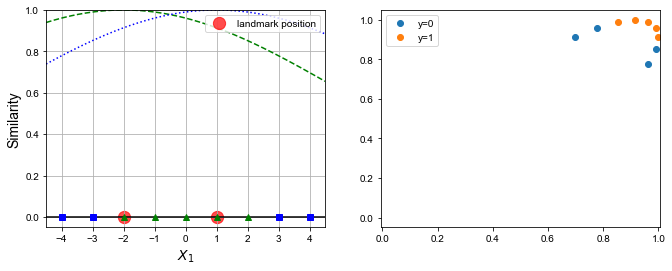

In [273]:
gamma=0.01
plot_rbf(X,y,landmark,gamma,axis=[-4.5,4.5,0,1],legend=True)

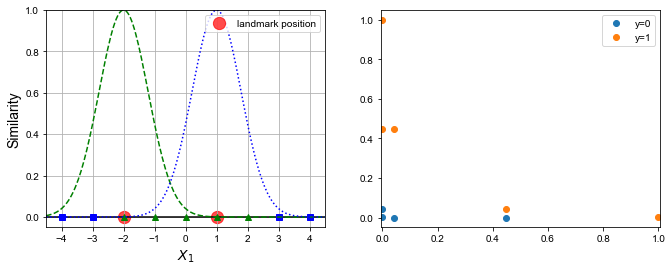

In [274]:
gamma=0.8
plot_rbf(X,y,landmark,gamma,axis=[-4.5,4.5,0,1],legend=True)

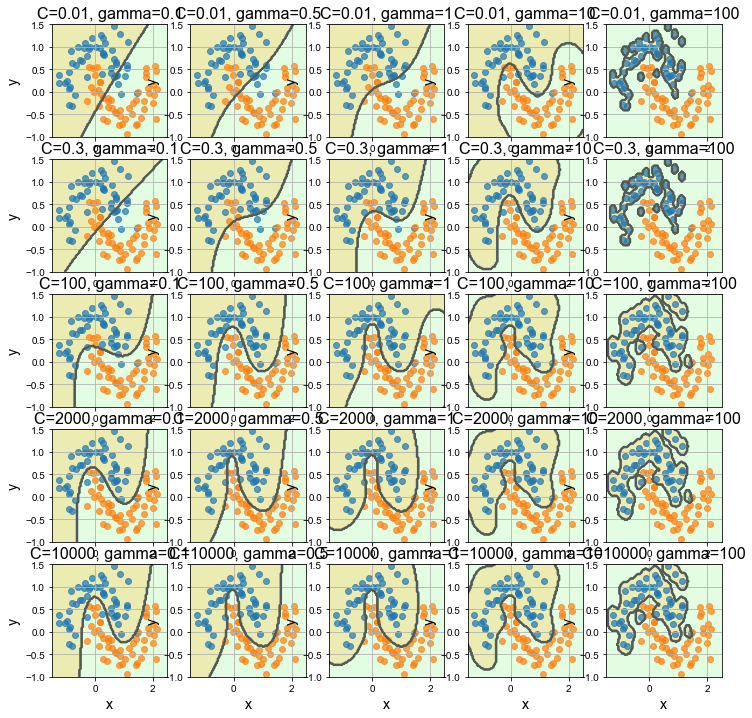

In [297]:
# 对比不同 C 值和 gamma 值
from sklearn.datasets import make_moons
from sklearn.svm import SVC
X,y = make_moons(n_samples=100, noise=0.25, random_state=0)

C_list = [0.01,0.3,100,2000,10000]
gamma_list = [0.1,0.5,1,10,100]
para_list = [(C,gamma) for C in C_list for gamma in gamma_list]

total_situation = len(para_list)

if not total_situation%5:
    row = 5
    col = int(total_situation/5)
elif not total_situation%4 and total_situation>4:
    row = 4
    col = int(total_situation/4)
elif not total_situation%2:
    row = 2
    col = int(total_situation/2)
elif not total_situation%3:
    row = 3
    col = int(total_situation/3)

plt.figure(figsize=(12,12))
for index,(C,gamma) in enumerate(para_list):
    plt.subplot(row,col,index+1)
    svc_clf = SVC(kernel="rbf", C=C, gamma=gamma, coef0=1)
    svc_clf.fit(X,y)
    plot_decision_boundary(svc_clf,X,y,axis=[-1.5,2.5,-1,1.5],alpha=0.7,title=f"C={svc_clf.C}, gamma={svc_clf.gamma}",legend=False)